In [24]:
from google.colab import drive
from google.colab import files

#Read and write files directly from google drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
#install packages missing from the Colab environment
!pip install geopandas
!pip install rasterio

In [0]:
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import pandas as pd

In [0]:
#Define a Bounding Boxes class to store all calculations and methods for plotting
class Bounding_Boxes:

  #Instantiate Bounding_Boxes class using vector data - this class is written specifically to accept volcano specific data
  def __init__(self, vector_data):
    
    #Add vector_data attribute to inspect original vector data
    self.vector_data = vector_data
    
    bbox = {}
    bbox['Archipelago'] = vector_data.total_bounds
    
    isabela_list = ['Darwin', 'Alcedo', 'Ecuador', 'South', 'Wolf']
    
    bbox['Isabela'] = vector_data[vector_data['Name'].isin(isabela_list)].total_bounds
    
    for island in list(vector_data.Name.unique()):
      bbox[island] = vector_data[vector_data['Name']==island].envelope
    self.bboxes = bbox
    
    #Add volcano_names class to inspect all unique volcano names (useful for plotting)
    volcano_names = list(vector_data.Name.unique()) + ['Archipelago'] + ['Isabela']
    self.volcano_names = volcano_names
      
  #Define a method to create matplotlib compatible xlim
  def x_lim_island(self, island, zoom_factor=0.15):
    
    #Define the factor by which to zoom out x axis (this could be made into two zooms L & R)
    #z_factor = 0.15 means that 15% of the total boundign box will be added to both sides
    #This scales with the size of the island to add a border to all plots
    z_factor = zoom_factor
    
    #Archipelago is a ndarray data type not a Shapely Polygon
    if island in ['Archipelago', 'Isabela']:
      xmin = self.bboxes[island][0]
      xmax = self.bboxes[island][2]
    
      zoom = (xmax - xmin) * z_factor
      
      #Returns xlim ready for the plt.xlim function
      return(xmin - zoom, xmax + zoom)
    
    #Extract coordinates from Shapely Polygon bounding boxes
    else:
      xmin = mapping(self.bboxes[island])['bbox'][0]
      xmax = mapping(self.bboxes[island])['bbox'][2]
  
      zoom = (xmax - xmin) * z_factor
    
      #Returns xlim ready for the plt.xlim function    
      return(xmin - zoom, xmax + zoom)

  #Copy of x_lim_island for the y axis
  def y_lim_island(self, island, zoom_factor=0.15):
  
    z_factor = zoom_factor
  
    if island in ['Archipelago', 'Isabela']:
      ymin = self.bboxes[island][1]
      ymax = self.bboxes[island][3]
    
      zoom = (ymax - ymin) * z_factor
      
      return(ymin - zoom, ymax + zoom)
  
    else:
      ymin = mapping(self.bboxes[island])['bbox'][1]
      ymax = mapping(self.bboxes[island])['bbox'][3]
    
      zoom = (ymax - ymin) * z_factor
  
      return(ymin - zoom, ymax + zoom) 

In [0]:
volcanoes = gpd.read_file('drive/My Drive/Hamish mapping/Hamish mapping/Environmental layers/Shp/Island_volcanos_wgs.shp', 
                          driver='ESRI Shapefile')

In [41]:
island_boxes = Bounding_Boxes(volcanoes)
island_boxes.bboxes

{'Alcedo': 14    POLYGON ((-91.24849 -0.60717, -90.94138 -0.607...
 dtype: geometry,
 'Archipelago': array([-91.6618164,  -1.4118595, -89.2410713,   0.6436304]),
 'Baltra': 6    POLYGON ((-90.29886 -0.48424, -90.24748 -0.484...
 dtype: geometry,
 'Darwin': 15    POLYGON ((-91.41014 -0.38714, -91.10919 -0.387...
 dtype: geometry,
 'Ecuador': 16    POLYGON ((-91.59556 -0.05537, -91.45566 -0.055...
 dtype: geometry,
 'Espanola': 0    POLYGON ((-89.74608 -1.41186, -89.61803 -1.411...
 dtype: geometry,
 'Fernandina': 9    POLYGON ((-91.66182 -0.50665, -91.37685 -0.506...
 dtype: geometry,
 'Floreana': 1    POLYGON ((-90.51124 -1.36024, -90.35227 -1.360...
 dtype: geometry,
 'Genovesa': 11    POLYGON ((-89.97805 0.29971, -89.93585 0.29971...
 dtype: geometry,
 'Isabela': array([-91.59555645,  -1.05687898, -90.77983582,   0.16671846]),
 'Marchena': 12    POLYGON ((-90.54310 0.27705, -90.40114 0.27705...
 dtype: geometry,
 'Pinta': 13    POLYGON ((-90.79055 0.53988, -90.71840 0.53988...
 dtype

In [0]:
#Try to extract coordinates from polygon to store in array like Isabela and Archipelago

#Get full coords, now need BL and UR
poly_coords = volcanoes.iloc[0, 1].envelope.exterior.coords.xy

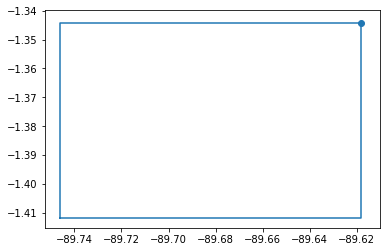

In [46]:
plt.plot(poly_coords[0], poly_coords[1])

plt.scatter(poly_coords[0][2], poly_coords[1][2])

In [53]:
#Bottom Left corner =
bl_x_coord = volcanoes.iloc[0, 1].envelope.exterior.coords.xy[0][0]
bl_y_coord = volcanoes.iloc[0, 1].envelope.exterior.coords.xy[1][0]
ur_x_coord = volcanoes.iloc[0, 1].envelope.exterior.coords.xy[0][2]
ur_y_coord = volcanoes.iloc[0, 1].envelope.exterior.coords.xy[1][2]

poly_bounds_format = np.array([bl_x_coord, bl_y_coord, ur_x_coord, ur_y_coord])
poly_bounds_format

array([-89.7460815,  -1.4118595, -89.6180319,  -1.34431  ])

In [51]:
#check that this is the same as the output from the total_bounds 
volcanoes.total_bounds

array([-91.6618164,  -1.4118595, -89.2410713,   0.6436304])

In [59]:
poly_bounds_format[[0, 2], ]

array([-89.7460815, -89.6180319])

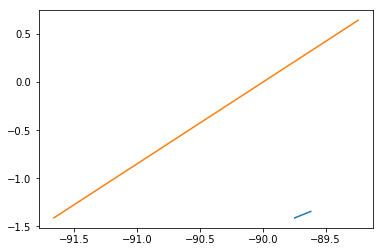

In [58]:
plt.plot(poly_bounds_format[[0, 2], ], poly_bounds_format[[1, 3], ])
plt.plot(volcanoes.total_bounds[[0, 2], ], volcanoes.total_bounds[[1, 3], ])

In [0]:
coord_list = {}

for i, volcano in enumerate(volcanoes.iloc[:, 0]):
  bl_x_coord = volcanoes.iloc[i, 1].envelope.exterior.coords.xy[0][0]
  bl_y_coord = volcanoes.iloc[i, 1].envelope.exterior.coords.xy[1][0]
  ur_x_coord = volcanoes.iloc[i, 1].envelope.exterior.coords.xy[0][2]
  ur_y_coord = volcanoes.iloc[i, 1].envelope.exterior.coords.xy[1][2]

  poly_bounds_format = np.array([bl_x_coord, bl_y_coord, ur_x_coord, ur_y_coord])
  
  coord_list[volcano] = poly_bounds_format

coord_list['Archipelago'] = volcanoes.total_bounds
isabela_list = ['Darwin', 'Alcedo', 'Ecuador', 'South', 'Wolf']
coord_list['Isabela'] = volcanoes[volcanoes['Name'].isin(isabela_list)].total_bounds


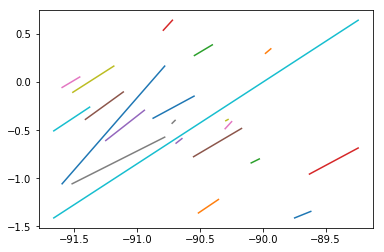

In [72]:
for island in coord_list:
  plt.plot(coord_list[island][[0, 2], ], coord_list[island][[1, 3], ])

In [0]:
import csv

path = 'drive/My Drive/Hamish mapping/Hamish mapping/tmp/'
bb_file = 'bounding_box_geometry.csv'

csvfile = open(path + bb_file, 'w')
csvwriter = csv.writer(csvfile, delimiter=',')
csvwriter.writerow(['volcano_name', 'min_lon', 'min_lat', 'max_lon', 'max_lat'])

for island in coord_list:
  csvwriter.writerow([island, coord_list[island][0], coord_list[island][1], coord_list[island][2], coord_list[island][3]])
  
csvfile.close()


In [0]:
string = island_boxes.bboxes[island_boxes.volcano_names[0]]

In [14]:
type(string)

geopandas.geoseries.GeoSeries

In [0]:
import csv

bbox = {}

csv_path = 'drive/My Drive/Hamish mapping/Hamish mapping/tmp//bounding_box_geometry.csv'

geometry_csv = open(csv_path, 'r')

csv_reader = csv.reader(geometry_csv, delimiter=',')
for row in csv_reader:
  bbox[row[0]] = row[1]

geometry_csv.close()

In [20]:
bbox['Alcedo']

'14    POLYGON ((-91.24849 -0.60717, -90.94138 -0.607...\ndtype: geometry'